## Árboles de Decisión

Un árbol de decisión es un modelo predictivo que se utiliza tanto para clasificación como para regresión. A continuación, explicamos su funcionamiento de manera teórica y computacional:

### 1. Concepto Clave

El modelo de árboles de decisión divide el espacio de características en regiones más pequeñas y homogéneas mediante "divisiones" o "splits". Cada división se realiza seleccionando la característica que mejor separa los datos de acuerdo a una medida como **gini** o **entropía** (para clasificación) o **error cuadrático** (para regresión).

#### Fórmulas de Clasificación:

- Índice de Gini: $$  Gini(t) = 1 - \sum_{i=1}^{n} p_i^2  $$
  
- Entropía: $$ Entropía(t) = - \sum_{i=1}^{n} p_i \log(p_i) $$
Donde \( p_i \) es la proporción de instancias de la clase \( i \) en el nodo \( t \).

### 2. Algoritmo del Árbol de Decisión

1. **Inicio del Árbol**: Todos los datos están en la raíz.
2. **Búsqueda de la Mejor División**: Para cada nodo, el algoritmo evalúa todas las características y selecciona la división que mejor separa los datos de acuerdo a la medida elegida (gini, entropía, etc.).
3. **División**: Divide el nodo en dos hijos, repitiendo el proceso hasta que no se puedan realizar más divisiones (criterio de parada: número mínimo de instancias o profundidad máxima).
4. **Predicción**: Para hacer una predicción, los datos nuevos siguen el camino del árbol desde la raíz hasta una hoja.

### 3. Implementación en Python

Vamos a construir un árbol de decisión con la librería `sklearn` y a analizar cómo se construye a partir de los datos.


In [1]:
# Importamos las librerías necesarias
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

# Cargamos el dataset Iris
iris = load_iris()

In [2]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [4]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

## Crea tu modelo de Árbol

Si echas un vistazo a los parámetros que puede tomar el [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), puede que te sorprendas, así que, veamos algunos de ellos.

- criterio: Este parámetro determina cómo se medirá la impureza de una división. El valor por defecto es «gini» pero también se puede utilizar «entropía» como métrica para la impureza.

- Separador: Esta es la forma en que el árbol de decisión busca las características para una separación. El valor por defecto es «mejor». Es decir, para cada nodo, el algoritmo considera todas las características y elige la mejor división. Si decide establecer el parámetro de división en «aleatorio», entonces se considerará un subconjunto aleatorio de características. La división se realizará por la mejor característica dentro del subconjunto aleatorio. El tamaño del subconjunto aleatorio viene determinado por el parámetro max_features. De aquí proviene en parte el nombre de Random Forest.

- Profundidad_máx: Determina la profundidad máxima del árbol. El valor por defecto es ninguno. Esto suele dar lugar a árboles de decisión sobreajustados. El parámetro de profundidad es una de las formas en que podemos regularizar el árbol, o limitar la forma en que crece para evitar el sobreajuste.

- min_samples_split: El número mínimo de muestras que debe contener un nodo para considerar la división. El valor por defecto es dos. Puede utilizar este parámetro para regularizar su árbol.

- min_samples_leaf: El número mínimo de muestras necesarias para ser considerado un nodo hoja. El valor por defecto es uno. Utilice este parámetro para limitar el crecimiento del árbol.

- características_max: El número de características a considerar cuando se busca la mejor división. Si no se establece este valor, el árbol de decisión considerará todas las características disponibles para realizar la mejor división. Dependiendo de su aplicación, a menudo es una buena idea ajustar este parámetro. [Aquí hay un artículo](https://stats.stackexchange.com/questions/324370/references-on-number-of-features-to-use-in-random-forest-regression) que recomienda cómo establecer max_features.



In [5]:
# Creamos el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=5, min_samples_leaf=6, random_state=10)
# Entrenamos el modelo con los datos
tree_model.fit(X_train, y_train);

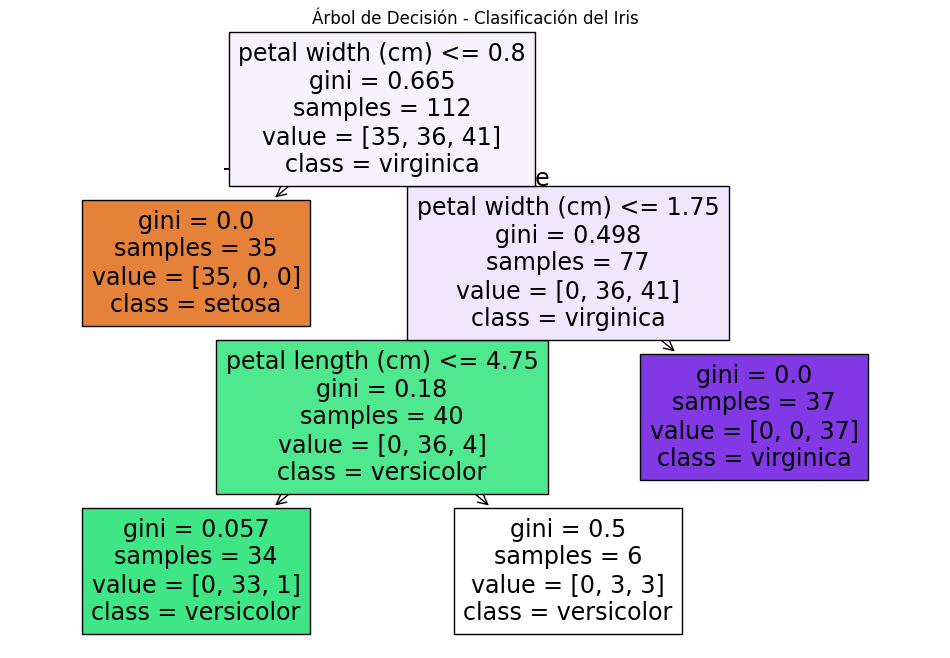

In [6]:
# Visualizamos el árbol de decisión
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Árbol de Decisión - Clasificación del Iris")
plt.show()

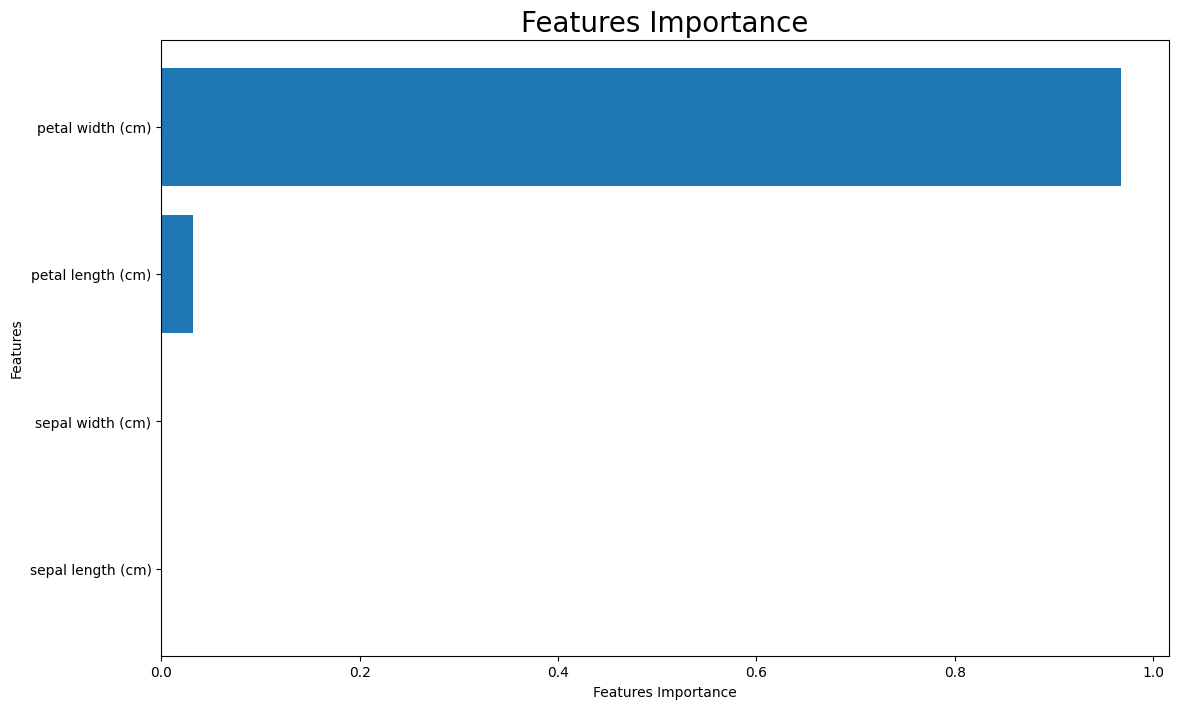

In [7]:
plt.figure(figsize=(13, 8))
caract = iris.data.shape[1]
plt.barh(range(caract), tree_model.feature_importances_)
plt.yticks(np.arange(caract), iris.feature_names)
plt.xlabel('Features Importance')
plt.ylabel('Features')
plt.title('Features Importance', fontsize=20)
plt.show()

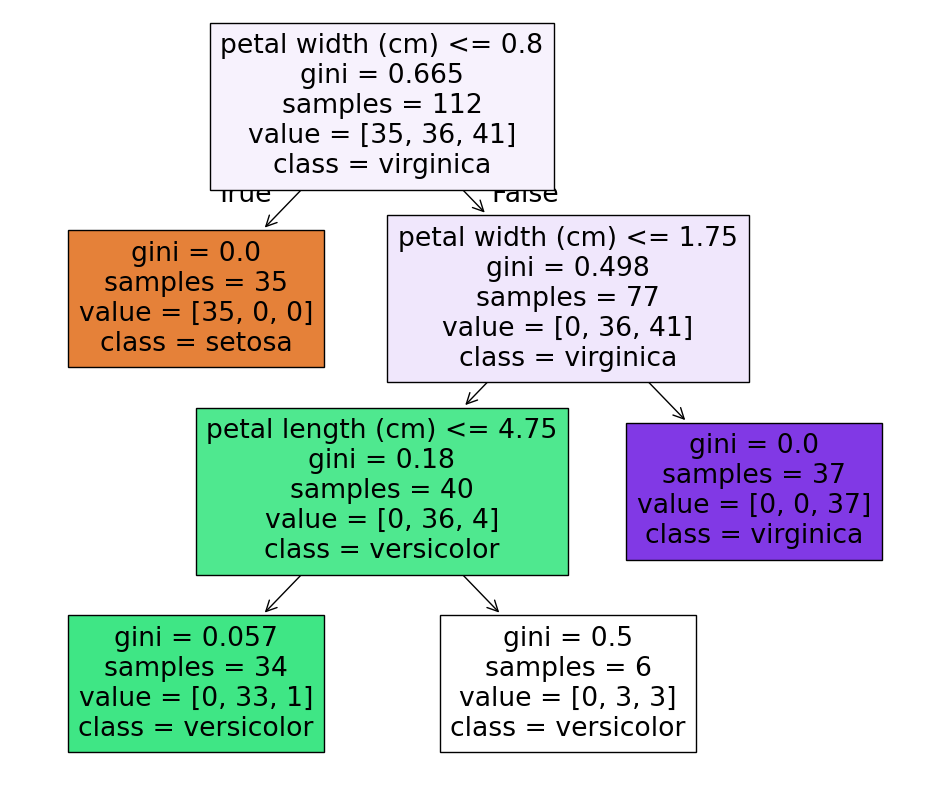

In [8]:
from sklearn import tree

plt.figure(figsize=(12, 10))
tree.plot_tree(tree_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [9]:
# Una vez entrenado el modelo, debemos utilizarlo para predecir datos nunca vistos antes
y_pred_dt = tree_model.predict(X_test)
y_pred_dt

array([2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2,
       1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [10]:
# Y compararlos con la etiqueta objetivo real
y_test


array([2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2,
       1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [11]:
y_pred_dt == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [12]:
# Usando esta fórmula podemos medir el % de muestras correctamente clasificadas
# Más adelante veremos mejores formas de medir el rendimiento de nuestro clasificador
y_pred_train = tree_model.predict(X_train)
accuracy = sum(y_pred_train == y_train) / len(y_pred_train)
print(f"Train Accuracy: {100 * accuracy:.2f}%")

Train Accuracy: 96.43%


In [13]:
# Usando esta fórmula podemos medir el % de muestras correctamente clasificadas
# Más adelante veremos mejores formas de medir el rendimiento de nuestro clasificador
accuracy = sum(y_pred_dt == y_test) / len(y_pred_dt)
print(f"Test Accuracy: {100 * accuracy:.2f}%")

Test Accuracy: 94.74%


**Sugerencia avanzada:** Puede utilizar el código siguiente para analizar más a fondo cómo nuestro modelo de árbol clasifica sus datos. Este fragmento mostrará los límites de decisión del modelo.

<ipython-input-14-b49c6a986882>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
<ipython-input-14-b49c6a986882>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
<ipython-input-14-b49c6a986882>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
<ipython-input-14-b49c6a986882>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
<ipython-input-14-b49c6a986882>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
<ipython-i

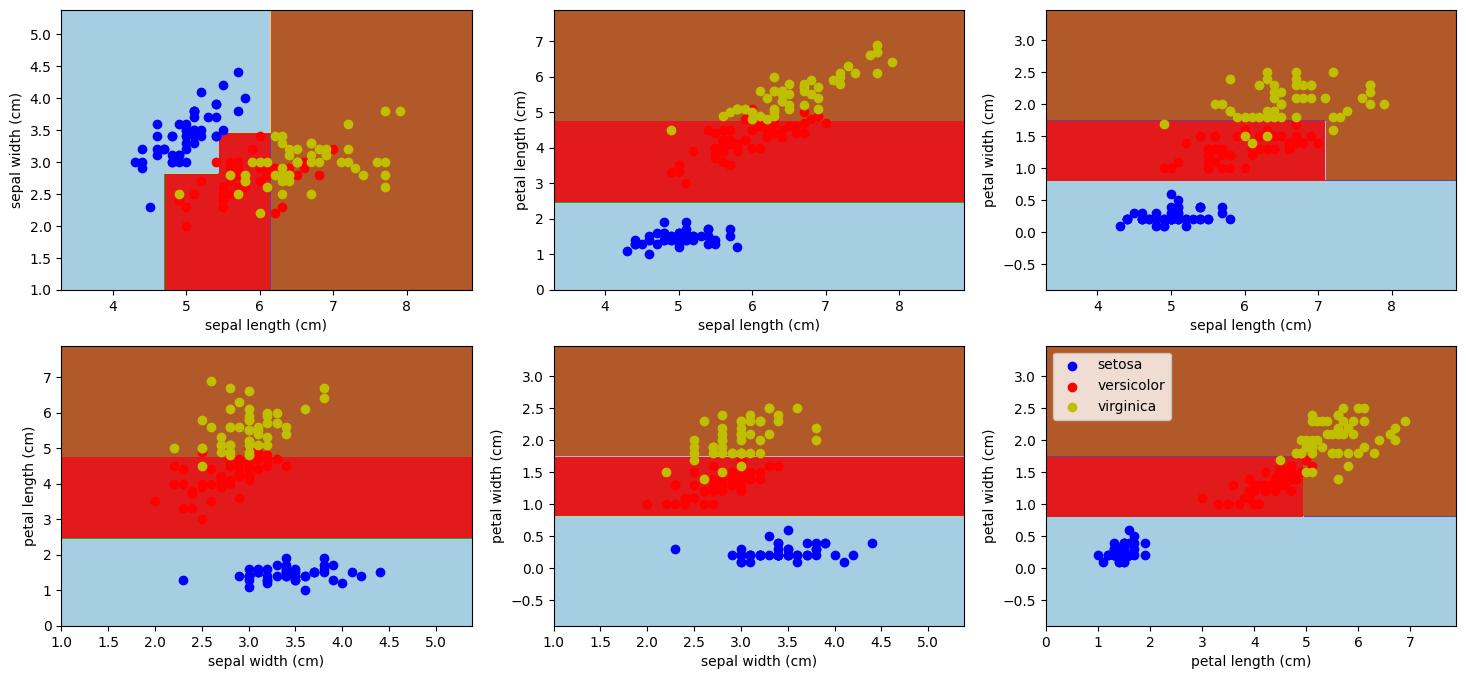

In [14]:
n_classes = 3
plot_colors = 'bry'
plot_step = 0.02

plt.figure(figsize=(18, 8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    tree_model = DecisionTreeClassifier(max_depth=3, random_state=10).fit(X, y)
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    Z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis('tight')

    for i, color in zip(range(n_classes), plot_colors):
        idx=np.where(y == i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis('tight')
plt.legend();

Probablemente se preguntarán si eso es todo. La respuesta es definitivamente no, pero les pido paciencia. Aún faltan cosas como:

* ¿Por qué hicimos esa división de datos en tren/prueba?
* ¿Cómo sabemos qué modelos son buenos?
* ¿Hay alguna forma de medir y comparar modelos?

Pronto podremos responder a estas preguntas.

---
## Regresión del Árbol de Decisión - PARA HACER

Ahora que ya sabes utilizar un Clasificador de Árbol de Decisión, te reto a que investigues el [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor), para ello puedes utilizar el conjunto de datos de Scikit-Learn __load_diabetes()__.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

---
## Referencia

- Hacia la ciencia de datos: explicación de los árboles de decisión de Scikit-Learn](https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d)

## Ejemplo Clasificación con Arboles de decision

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import preprocessing

In [16]:
#Apertura de archivo csv a un dataframe de pandas

#revisar la ruta para tu caso particular
ruta = "/content/Social_Network_Ads.csv"
dataset = pd.read_csv(ruta)
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [17]:
#Sacar las variables independientes
X = dataset.iloc[:,[2,3]].values

# Sacar la variable dependientes
y = dataset.iloc[:,4].values

In [18]:
#Division de Datos - entrenamiento y validacion

#herramienta para dividir los datos
from sklearn.model_selection import train_test_split

#divide los datos en 20% para la validacion y se colocar una semilla para hacer la division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [19]:
# Escalado de Variables - Estandarizacion y Normalizacion

#Es preferible utilizalo en algortimos que usan el calculo de distancia - pitagoras

#Estandarizacion
# sc_X = preprocessing.StandardScaler()

# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

In [20]:
from sklearn.tree import DecisionTreeClassifier
#Ajuste del clasificdor con Maquinas de soporte vectorial

clasificador = DecisionTreeClassifier(criterion="entropy", random_state=0)
clasificador.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
#Prediccion de los resultados con el conjusto de testing

y_pre = clasificador.predict(X_test)
#respuesta del modelo
print(y_pre)
#Valores dados por los datos de testing
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [22]:
#Comprobacion del resultado - Matriz de confucion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pre)
cm

array([[62,  6],
       [ 3, 29]])

### Interpretación de la Matriz de Confusión

Esta es una matriz de confusión para un problema de clasificación binaria. La matriz representa los resultados de un modelo de clasificación y se interpreta de la siguiente manera:

|            | Predicción Positiva | Predicción Negativa |
|------------|---------------------|---------------------|
| **Clase Positiva** | 62 (Verdaderos Positivos - VP) | 3 (Falsos Negativos - FN) |
| **Clase Negativa** | 6 (Falsos Positivos - FP) | 29 (Verdaderos Negativos - VN) |

#### Descripción:

- **62**: Verdaderos positivos (VP) - El modelo predijo correctamente 62 casos de la clase positiva.
- **6**: Falsos positivos (FP) - El modelo predijo que 6 casos eran de la clase positiva, pero en realidad eran de la clase negativa.
- **3**: Falsos negativos (FN) - El modelo predijo que 3 casos eran de la clase negativa, pero en realidad pertenecían a la clase positiva.
- **29**: Verdaderos negativos (VN) - El modelo predijo correctamente 29 casos de la clase negativa.

Con esta matriz, se pueden calcular métricas importantes para evaluar el rendimiento del modelo, como la **precisión**, **sensibilidad** (recall) y **especificidad**.

#### Ejemplo de cálculos:

- **Precisión**: Mide qué tan precisas son las predicciones positivas:
  \[
  \text{Precisión} = \frac{VP}{VP + FP} = \frac{62}{62 + 6} = 0.91
  \]

- **Sensibilidad** (o recall): Mide cuántos de los verdaderos positivos fueron correctamente clasificados:
  \[
  \text{Sensibilidad} = \frac{VP}{VP + FN} = \frac{62}{62 + 3} = 0.95
  \]

- **Especificidad**: Mide cuántos de los verdaderos negativos fueron correctamente clasificados:
  \[
  \text{Especificidad} = \frac{VN}{VN + FP} = \frac{29}{29 + 6} = 0.83
  \]


<ipython-input-23-4ac8d76937db>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


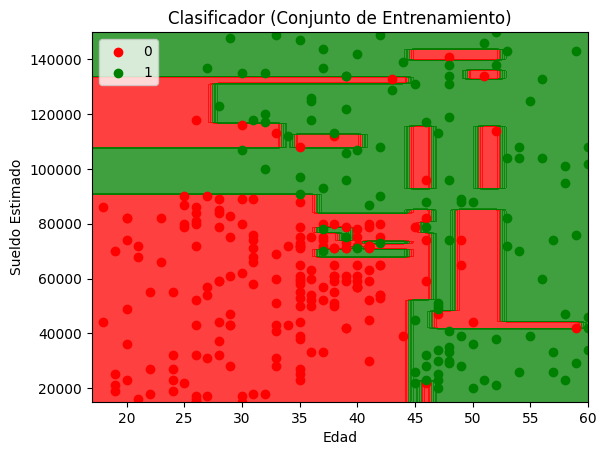

In [23]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 500))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()


<ipython-input-24-4b4205efe2ad>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


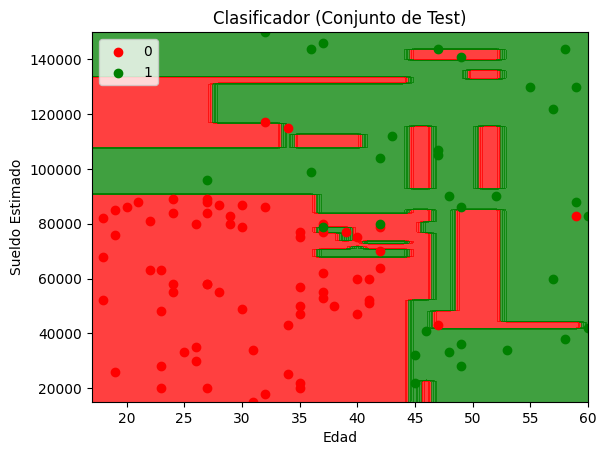

In [24]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 500))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# Ejemplo 2. Caso más avanzado...

Veremos árboles de decisión y los conceptos subyacentes asociados.

Haremos ejemplos de juguete y con datos generados artificialmente.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

## Entropía y Ganancia de Información

### Entropía

Definamos entropía para una distribución probabilista:

$$H(Y) = - \sum_{i=1}^k P(Y = y_i) log_2 P(Y = y_i)$$

In [26]:
def entropy(probs):
    return - np.sum(probs * np.log2(probs))

Veamos posibles entropías para el problema de tirar una moneda adulterada:

In [27]:
entropy(np.array([0.5, 0.5]))

1.0

In [28]:
entropy(np.array([0.01, 0.99]))

0.08079313589591118

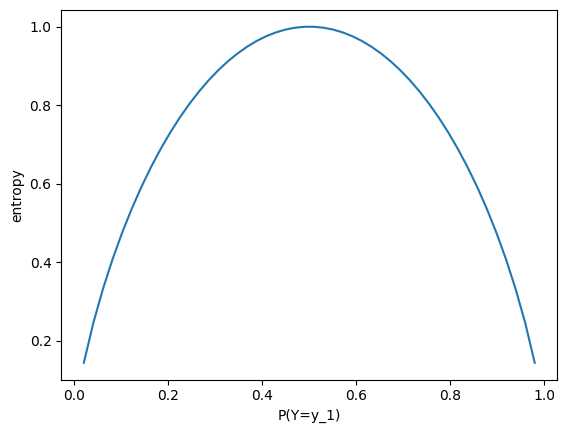

In [29]:
X = np.linspace(0, 1)[1:-1]
plt.plot(X, [entropy([x, 1-x]) for x in X])
plt.xlabel('P(Y=y_1)')
plt.ylabel('entropy')
plt.show()

En el caso de dos monedas, tenemos cuatro combinaciones posibles, siendo $0.25$ la probabilidad de cada evento. Ejemplos:

In [30]:
entropy(np.array([0.25, 0.25, 0.25, 0.25]))

2.0

Pero si las monedas estan sesgadas tendríamos:

In [31]:
entropy(np.array([0.49, 0.49, 0.01, 0.01]))

1.1414405425418206

### Entropía de un Dataset

Un dataset define una distribución empírica. La entropía del dataset es entones la entropía de la distribución asociada. Definamos el cálculo de la distribución, y luego redefinamos entropía:

In [32]:
def probs(y):
    _, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return probs

Definimos un dataset de 6 elementos con dos atributos $X_1$ y $X_2$ con dos tipos de etiquetas:

$False: -1$ y $True: 1$.

Siendo las etiquetas resultantes del mismo:


In [33]:
y = np.array([1, 1, 1, 1, 1, -1])

Mediante la función "probs" podemos calcular la probilidad de cada clase en este dataset:

In [34]:
probs(y)

array([0.16666667, 0.83333333])

Esos resultados nos informan que hay un desbalance en el mismo (hay más probabilidad de una de las clases).

Ahora obtengamos la entropía del dataset:

In [35]:
def entropy(y):
    p = probs(y)
    return - np.sum(p * np.log2(p))

In [36]:
entropy(y)

0.6500224216483541

### Entropía Condicional

Definamos entropía condicional:

$$H(Y|X) = - \sum_{j=1}^v P(X = x_j) \sum_{i=1}^k P(Y = y_i | X = x_j) log_2 P(Y = y_i | X = x_j)$$

Equivalentemente,

$$H(Y|X) = \sum_{j=1}^v P(X = x_j) H(Y|X = x_j)$$

Tomaremos $X$ binaria ($v=2$), por lo que la entropía condicional tendrá sólo dos términos.


In [37]:
def cond_entropy(y1, y2):
    size = y1.shape[0] + y2.shape[0]
    return y1.shape[0] / size * entropy(y1) + y2.shape[0] / size * entropy(y2)

Esta función toma como argumento los dos subconjuntos de datos que se forman al considerar una de las variables como condición.

Si analizámos la varibale $Y$ donde la $X_1$ es $True$, tenemos:

In [38]:
y_X1true = np.array([1,1,1,1]) #X1 = True

de igual manera, la varibale $Y$  donde la $X_1$ es $False$, tenemos:

In [39]:
y_X1false =  np.array([1,-1]) #X1 = False

Haciendo uso de la función "cond_entropy" podemos obtener la entropía condicional de la variable $Y$ dado $X_1$

In [40]:
cond_entropy(y_X1true,y_X1false)  # x1

0.3333333333333333

De igual manera podemos calcular la entropía condicional dado la variable $X_2$

In [41]:
y_X2true = np.array([1,1,1]) #X2 = True
y_X2false = np.array([1,1,-1]) #X2 = False
cond_entropy(y_X2true, y_X2false)  # x2

0.4591479170272448

### Ganancia de Información

La ganancia de información será simplemente la diferencia entre entropía y entropía condicional:

In [42]:
def information_gain(y1, y2):
    y = np.concatenate((y1,y2))
    return entropy(y) - cond_entropy(y1,y2)

Podemos calcular la ganancia de información que implicaría dividir el dataset tomando como $X_1$ como nodo referencia. Para ello hacemos uso de la función "information_gain" que toma los dos subconjuntos de etiquetas que se formarían al tomar una u otra variable como referencia.

Para el caso de $X_1$:

In [43]:
information_gain(y_X1true, y_X1false)  # x1

0.3166890883150208

Para el caso de $X_2$:


In [44]:
information_gain(y_X2true, y_X2false)  # x2

0.19087450462110933

## Datos Sintéticos No Linealmente Separables

Haremos algunos experimentos con datos generados sintéticamente. Estos datos serán no linealmente separables.

Ejemplos típicos de datos no linealmente separables son los de tipo "OR", "AND" y "XOR". Usaremos datos de tipo "OR" para este ejemplo.



In [45]:
size = 200

In [46]:
np.random.seed(0)
X = np.random.randn(size, 2)
y_true = np.logical_or(X[:, 0] > 0, X[:, 1] > 0)    # datos "OR"
#y_true = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)  # datos "XOR"
#y_true = np.logical_and(X[:, 0] > 0, X[:, 1] > 0)  # datos "AND"
y_true = y_true.astype(int)
y_true[y_true == 0] = -1

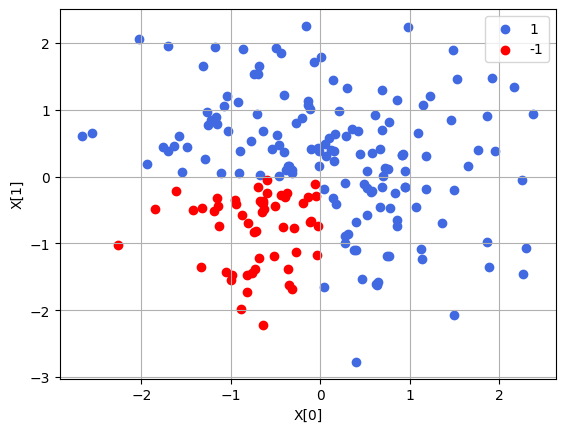

In [47]:
plt.scatter(X[y_true==1, 0], X[y_true==1, 1], color="royalblue", label="1")
plt.scatter(X[y_true==-1, 0], X[y_true==-1, 1], color="red", label="-1")
plt.grid()
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.legend()
plt.show()

### División en Entrenamiento y Evaluación

Separemos la mitad para entrenamiento y la otra para evaluación.

In [48]:
train_size = 100
test_size = size - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_true[:train_size], y_true[train_size:]

In [49]:
X_train.shape, X_test.shape

((100, 2), (100, 2))

### Clasificación Lineal

Veamos qué tan mal anda un clasificador lineal sobre estos datos.

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=ad40eaa5f4093605418b3662a3271cd117c2a7e00c97be74cb4bb09556d308fe
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [54]:
import utils
print(dir(utils))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']


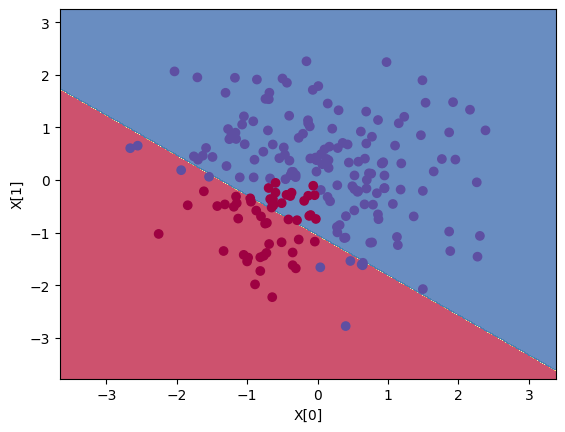

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(pred_func, X, y):
    # Establecer los límites del gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01  # Paso en la malla
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predecir las clases para cada punto en la malla
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Trazar la superficie de decisión
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Usar la función para visualizar la frontera de decisión
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plot_decision_boundary(lambda x: model.predict(x), X, y_true)

Calculemos la calidad de la predicción en entrenamiento y evaluación:

In [57]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 0.91
Test accuracy: 0.78


### Nota al Margen: Induciendo Separabilidad Lineal

Muchas veces se pueden convertir datos no linealmente separables en datos separables (o casi) mediante la introducción de nuevos atributos que combinan los atributos existentes.
Un ejemplo de estos son los atributos polinomiales.

Aquí lo haremos con datos "OR", pero la diferencia es mucho más notable con datos de tipo "XOR".

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pre = PolynomialFeatures(
    degree=2,
    interaction_only=True,  # para usar solo x0*x1, no x0*x0 ni x1*x1
    include_bias=False)
X_train2 = pre.fit_transform(X_train)

In [60]:
X_train.shape, X_train2.shape  # se agregó el feature x0*x1

((100, 2), (100, 3))

Grafiquemos:

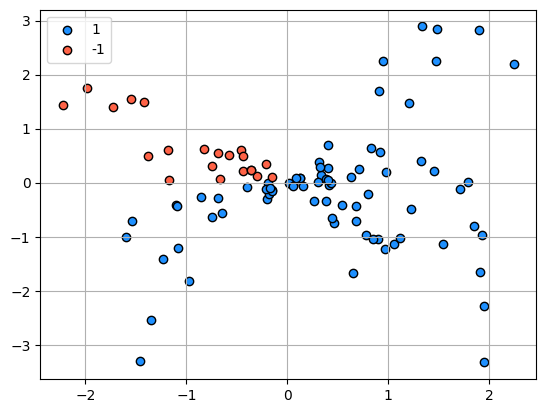

In [61]:
plt.scatter(X_train2[y_train==1, 1], X_train2[y_train==1, 2], color="dodgerblue", edgecolors='k', label="1")
plt.scatter(X_train2[y_train==-1, 1], X_train2[y_train==-1, 2], color="tomato", edgecolors='k', label="-1")
plt.grid()
plt.legend()
plt.show()

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
    LogisticRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('logisticregression', LogisticRegression())])

In [63]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 0.97
Test accuracy: 0.86


Text(0, 0.5, 'X[1]')

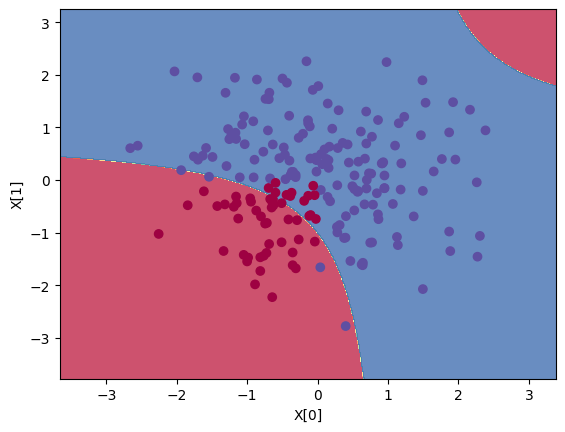

In [65]:
plot_decision_boundary(lambda x: model.predict(x), X, y_true)
plt.xlabel("X[0]")
plt.ylabel("X[1]")

### Entropía y Valores Reales

Calculemos la entropía inicial, y veamos cómo condicionar la entropía sobre variables reales (i.e. no categóricas)

In [66]:
y_train

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1])

Podemos calcular la probabilidad de cada clase:

In [67]:
probs(y_train)

array([0.21, 0.79])

y la entropía:

In [68]:
entropy(y_train)

0.7414827399312737

Para hacer una división sobre una variable real usaremos un valor "threshold" (umbral):

In [69]:
def split(X, y, i, threshold):
    y1 = y[X[:, i] > threshold]
    y2 = y[X[:, i] <= threshold]
    return y1, y2

definimos la "split" que toma como argumento el dataset con sus etiquetas, el indice de la variable que usaremos para dividir el dataset y el umbral para realizarlo y nos devuelve dos subconjuntos de este dataset.

Si utilizamos la variable $X_1$ con un umbral de $0.00$ obtenemos:

In [70]:
y1, y2 = split(X_train, y_train, 0, 0.00)

In [71]:
y1,y2

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1]),
 array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
         1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
         1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        -1]))

Siendo la entropía de cada uno de ellos:

In [72]:
entropy(y1), entropy(y2)

(-0.0, 0.9731560354421095)

In [73]:
cond_entropy(y1, y2)

0.506041138429897

In [74]:
information_gain(y1,y2)

0.23544160150137672

### Buscando la Mejor División

Ilustraremos un paso en la construcción del árbol de decisión.

Probemos muchos threshold para ambas variables y seleccionemos la mejor división.

En este caso buscaremos en una grilla uniforme de valores, pero existen técnicas mejores.

In [75]:
np.linspace(-2.5, 2.5, 11)

array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5])

In [76]:
best_ig = 0

for i in [0, 1]:
    for threshold in np.linspace(-2.5, 2.5, 11):
        y1, y2 = split(X_train, y_train, i, threshold)
        ig = information_gain(y1, y2)
        print(f'i={i}\tthreshold={threshold:+00.2f}\tig={ig:.2f}')

        if ig >= best_ig:
            best_ig = ig
            best_feature = i
            best_threshold = threshold

print('Mejor división:')
print(f'feature={best_feature}, threshold={best_threshold}, ig={best_ig:00.2f}')


i=0	threshold=-2.50	ig=0.00
i=0	threshold=-2.00	ig=0.00
i=0	threshold=-1.50	ig=0.00
i=0	threshold=-1.00	ig=0.00
i=0	threshold=-0.50	ig=0.12
i=0	threshold=+0.00	ig=0.24
i=0	threshold=+0.50	ig=0.13
i=0	threshold=+1.00	ig=0.06
i=0	threshold=+1.50	ig=0.03
i=0	threshold=+2.00	ig=0.01
i=0	threshold=+2.50	ig=0.00
i=1	threshold=-2.50	ig=0.00
i=1	threshold=-2.00	ig=0.02
i=1	threshold=-1.50	ig=0.05
i=1	threshold=-1.00	ig=0.06
i=1	threshold=-0.50	ig=0.12
i=1	threshold=+0.00	ig=0.32
i=1	threshold=+0.50	ig=0.15
i=1	threshold=+1.00	ig=0.07
i=1	threshold=+1.50	ig=0.04
i=1	threshold=+2.00	ig=0.00
i=1	threshold=+2.50	ig=0.00
Mejor división:
feature=1, threshold=0.0, ig=0.32


Dividamos los datos de acuerdo a esta frontera:

In [77]:
best_feature, best_threshold

(1, 0.0)

Podemos ver los datos en el gráfico

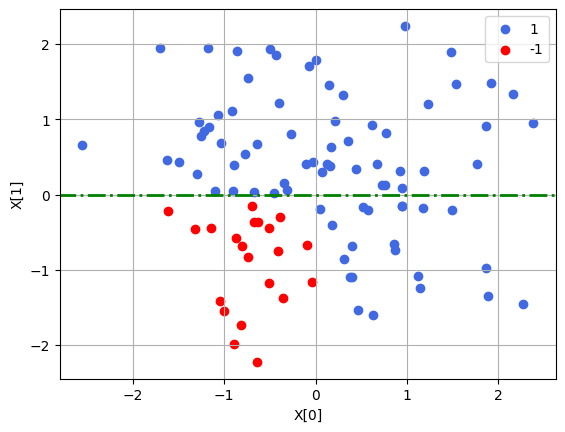

In [78]:
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color="royalblue", label="1")
plt.scatter(X_train[y_train==-1, 0], X_train[y_train==-1, 1], color="red", label="-1")

plt.axhline(y=0, xmin=-3, xmax=3, color='green', linestyle='-.', linewidth=2)

plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.grid()
plt.legend()
plt.show()

In [79]:
y1, y2 = split(X_train, y_train, best_feature, best_threshold)

Con esta división, la entropía baja considerablemente:

In [80]:
entropy(y_train)

0.7414827399312737

In [81]:
cond_entropy(y1, y2)

0.42

## Árbol de Decisión con Scikit-learn

Aprendamos un árbol de decisión usando scikit-learn. Para ello usaremos la clase [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):


In [82]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Ahora predecimos y evaluamos:

In [83]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 1.0
Test accuracy: 0.97


Dibujamos la frontera de decisión:

Text(0, 0.5, 'X[1]')

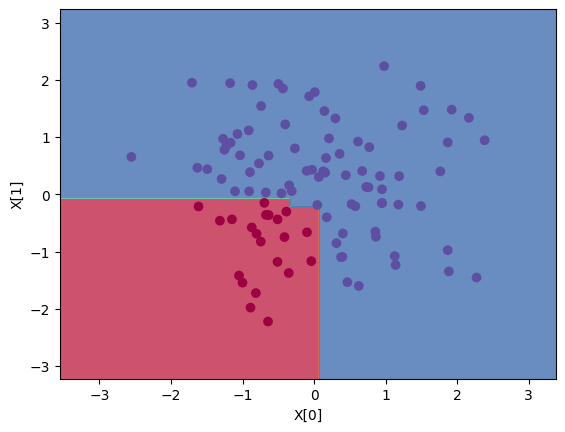

In [86]:
plot_decision_boundary(lambda x: clf.predict(x), X_train, y_train)
plt.xlabel("X[0]")
plt.ylabel("X[1]")

También podemos inspeccionar el árbol:

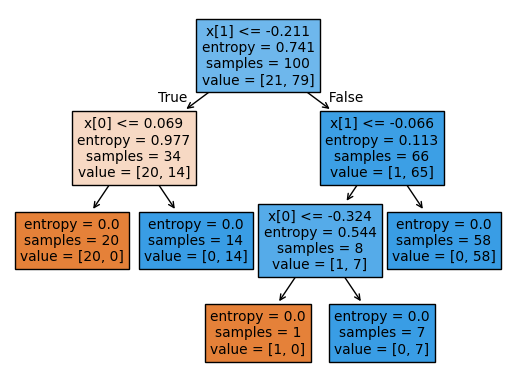

In [87]:
from sklearn.tree import plot_tree

plot_tree(clf,filled=True);

In [88]:
entropy(y_train)

0.7414827399312737

## Referencias

Scikit-learn:

- [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [User Guide: Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
